<a href="https://colab.research.google.com/github/shyammarjit/Corona-Virus-Prediction-Model-Using-Machine-Learning/blob/main/Covid_19_Indian_Death_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model-1.1
> Covid-19 Indian Death Predictor using Normal Equation in linear regression with regularization.

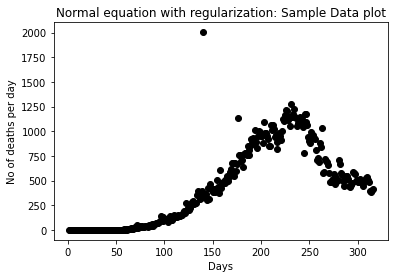

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
days = np.arange(316)
train_days = np.arange(300)
test_days = np.arange(16)
for i in range(0,316):
  days[i] = i+1
  if(i<300):
    train_days[i] = i+1
  else:
    test_days[i-300] = i+1   
data = pd.read_csv('Covid19_India_Shyam.csv', sep=',',header=None)
shyam = data.values
sample_data = np.arange(316)
for i in range(1,316):
  sample_data[i]= shyam[i][1]
#print(sample_data)
#print(len(days), len(sample_data))
plt.title("Normal equation with regularization: Sample Data plot")
plt.xlabel("Days")
plt.ylabel("No of deaths per day")
plt.scatter(days, sample_data,  color='black')
plt.show()

# New section

Showing the theta (or the parameters) for the hypothesis:
[[ 2.39671871e-14]
 [ 3.14285146e-12]
 [ 4.00113814e-10]
 [ 4.43209334e-08]
 [ 3.40043901e-06]
 [-2.03265186e-08]
 [ 3.06216011e-11]]
Ploting the graph:


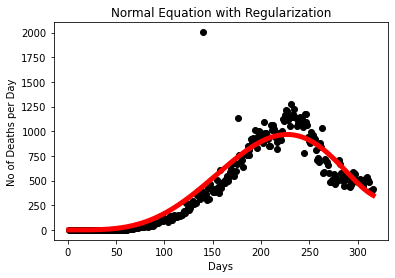

In [ ]:
import numpy as np
#for inverse matrix
from numpy.linalg import pinv
import matplotlib.pyplot as plt
x = days
y = sample_data
# form matrix X and Y and coefficent of lembda
X = np.array([np.ones(len(x)),x, np.power(x, 2),np.power(x, 3) ,np.power(x, 4),np.power(x, 5),np.power(x, 6) ]).T
Y = (y[:, np.newaxis])
one = np.identity(X.shape[1])
one[0,0] = 0
lamda = 2
# apply normal equation
theta_final = pinv(X.T.dot(X) + lamda*one).dot(X.T).dot(Y)
print("Showing the theta (or the parameters) for the hypothesis:\n"+ str(theta_final))
print("Ploting the graph:")
y_pred = theta_final.T.dot(X.T)
model_1_output = y_pred
plt.title("Normal Equation with Regularization")
plt.xlabel("Days")
plt.ylabel("No of Deaths per Day")
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred[0,:], color='red', linewidth=5)
plt.show()

In [ ]:
# Prediction for january month
# generating fuction of death is y= Hw(X) = [1 + X + X^2 + X^3 + X^4 + X^5 + X^6]*theta_final.T
import numpy as np
jan_days = np.arange(31)
draft = np.arange(31)
res = np.arange(31)
death = np.arange(31)
total_death = 0
for i in range(0,31):
  jan_days[i] = 336+i
draft = np.array([np.ones(len(jan_days)),jan_days, np.power(jan_days, 2),np.power(jan_days, 3) ,np.power(jan_days, 4),np.power(jan_days, 5),np.power(jan_days, 6)]).T
res = np.dot(draft,theta_final)
for i in range(0,30):
  if(res[i]-abs(res[i])>=0.50):
    death[i] = res[i][0]+1
  else:
    death[i] = res[i][0]-1
  total_death = total_death + death[i]
print("The expected number of deaths due to COVID-19 for the month of January, 2021 using Normal equation with regularization : " + str(total_death))


The expected number of deaths due to COVID-19 for the month of January, 2021 using Normal equation with regularization : 18705


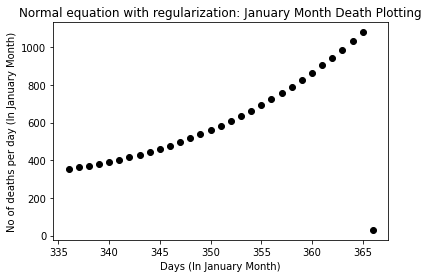

In [ ]:
plt.title("Normal equation with regularization: January Month Death Plotting")
plt.xlabel("Days (In January Month)")
plt.ylabel("No of deaths per day (In January Month)")
plt.scatter(jan_days, death,  color='black')
plt.show()

#Model-1.2
Using iterative method with regularization


In [ ]:
# Data making
data  = []
import numpy as np
data_e = np.arange(316*2).reshape(316,2)
for i in range(0,316):
    data_e[i][0] = days[i]
    data_e[i][1] = sample_data[i]
data =data_e.tolist()
#data = [(1, 1), (2, 2), (5, 5.5), (6, 8), (9, 10)]

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation

"""
Dummy Data for Linear Regression
"""
#data = [(1, 1), (2, 2), (5, 5.5), (6, 8), (9, 10)]    
"""
Plot the line using theta_values
"""
print(type(data))
def plot_line(formula, x_range, order_of_regression, label=None):
    x = np.array(x_range).tolist()  
    y = [formula(update_features(x_i, order_of_regression, 9)) for x_i in x]
    l, = plt.plot(x, y, label=label, color = 'darkorange')
    return l

<class 'list'>


In [ ]:
"""
Hypothesis Function
"""
def h(x, theta):
    return np.matmul(theta.T, x)[0][0]
"""
Update features by order of the regression
"""

def update_features(x, order_of_regression, m = 9):
    features = [2]
    for i in range(order_of_regression):
        features.append(math.pow(x, i+1)/ math.pow(m, i+1))
    return np.atleast_2d(features).T

"""
Simultaneous Update
"""
def update_theta(data, alpha, theta, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * j_prime_theta(data, theta, order_of_regression, i))
    theta = np.array(temp)
    return theta
    

In [ ]:
def reg_j_prime_theta(data, theta, l, order_of_regression, i):
    result = 0
    m = len(data)
    for x, y in data :
        x = update_features(x, order_of_regression)
        result += (h(x, theta) - y) * x[i]
    result += l*theta[i]
    return (1/m) * result

def reg_j(data, theta, l, order_of_regression):
    cost = 0
    m = len(data)
    for x, y in data:
        x = update_features(x, order_of_regression)
        cost += math.pow(h(x, theta) - y, 2)
    reg = 0
    for j in theta:
        reg += math.pow(j, 2)
    reg = reg * l
    return (1/(2*m)) * (cost + reg)

def reg_update_theta(data, alpha, theta, l, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * reg_j_prime_theta(data, theta, l, order_of_regression, i))
    theta = np.array(temp)
    return theta

def reg_gradient_descent(data, alpha, l, tolerance, theta=[], order_of_regression =316):
    if len(theta) == 0:
        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T
    prev_j = 100000
    curr_j = reg_j(data, theta, l, order_of_regression)
    print(curr_j)
    cost_history = []
    theta_history = [] 
    counter = 0
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_history.append(theta)
            theta = reg_update_theta(data, alpha, theta, l, order_of_regression)
            prev_j = curr_j
            curr_j = reg_j(data, theta, l, order_of_regression)
            if counter % 100 == 0:
                print(curr_j)
            counter += 1
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta, cost_history, theta_history
reg_theta, reg_cost_history, reg_theta_history = reg_gradient_descent(data, 0.0001, 0.01 , 0.001, order_of_regression = 1)

NameError: ignored

In [ ]:
#print(reg_theta)
#print(reg_cost_history)
#print(reg_theta_history)

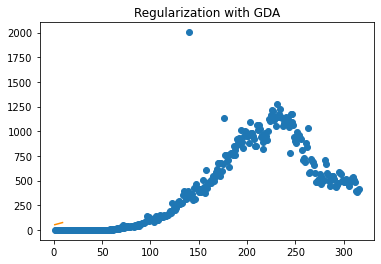

[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 1], [45, 0], [46, 1], [47, 0], [48, 0], [49, 1], [50, 0], [51, 1], [52, 0], [53, 0], [54, 3], [55, 2], [56, 1], [57, 1], [58, 5], [59, 3], [60, 5], [61, 3], [62, 14], [63, 6], [64, 6], [65, 16], [66, 14], [67, 13], [68, 22], [69, 16], [70, 27], [71, 20], [72, 46], [73, 22], [74, 41], [75, 42], [76, 27], [77, 37], [78, 27], [79, 26], [80, 38], [81, 35], [82, 38], [83, 33], [84, 53], [85, 36], [86, 40], [87, 59], [88, 44], [89, 56], [90, 58], [91, 69], [92, 71], [93, 75], [94, 77], [95, 92], [96, 140], [97, 103], [98, 128], [99, 91], [100, 104], [101, 97], [102, 115], [103, 112], [104, 81], [105, 120], [106, 13

In [ ]:
f = functools.partial(h, theta = reg_theta_history[-1])
plt.scatter([i[0] for i in data], [i[1] for i in data])
reg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=1, label='regularized')
#f = functools.partial(h, theta=theta_history[-1])
#unreg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=5, label='not regularized')
#plt.legend([reg, unreg], ['Regularized', 'Not Regularized'])
plt.title('Regularization with GDA')
plt.show()
print(data)

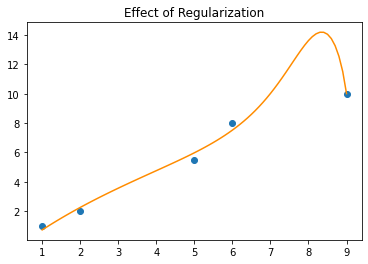

[(1, 1), (2, 2), (5, 5.5), (6, 8), (9, 10)]


In [ ]:

f = functools.partial(h, theta = reg_theta_history[-1])
plt.scatter([i[0] for i in data], [i[1] for i in data])
reg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=50, label='regularized')
#f = functools.partial(h, theta=theta_history[-1])
#unreg = plot_line(f, (np.array(range(10,91))/10).tolist(), order_of_regression=5, label='not regularized')
#plt.legend([reg, unreg], ['Regularized', 'Not Regularized'])
plt.title('Effect of Regularization')
plt.show()
print(data)

#Model-1.3
>Using locally weighted Linear Regression

In [ ]:
  def LWR(x, y, cp, tau):
    gamma = np.exp(np.sum((x-cp)**2, axis = 1)/(-2*tau*tau))
    w = (x.T) * gamma
    #print(w)
    Jw = np.linalg.pinv(w@x)@w@y
    #print(Jw)
    return (np.dot(cp, Jw))

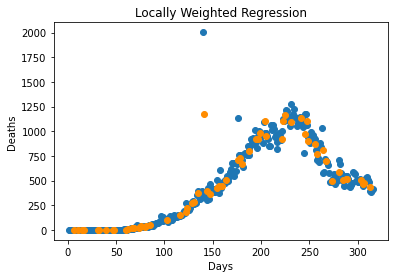

In [ ]:
def Locally_weighted_Reg (x, y, tau):
  #weight  = []
  y_pred = []
  x = np.c_[np.ones(len(x)), x]
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 3)
  for cp in x_test:
    predict = [LWR (x_train, y_train, cp, tau)]
    #print(predict)
    y_pred.append(predict)
  # Plotting graphs
  plt.title('Locally Weighted Regression')
  plt.xlabel('Days')
  plt.ylabel('Deaths')
  plt.scatter(x[:,1],y)
  plt.scatter(x_test[:,1], y_pred, color = 'darkorange')
  plt.show()
  return (y_pred,y_test)
tau = 0.08
(model_3_output, model_3_actual) = Locally_weighted_Reg (days, sample_data, tau)


In [ ]:
"""##prediction
jan_days_list = []
jan_days_list = jan_days.tolist()
Jan_pred = []
for i in jan_days_list:
  pred = [LWR(x, y, i, tau)]
  Jan_pred.append(pred)
plt.scatter(Jandays, Jan_pred) 

# x, y are actual data points... There is no need to use splitted data
"""

'##prediction\njan_days_list = []\njan_days_list = jan_days.tolist()\nJan_pred = []\nfor i in jan_days_list:\n  pred = [LWR(x, y, i, tau)]\n  Jan_pred.append(pred)\nplt.scatter(Jandays, Jan_pred) \n\n# x, y are actual data points... There is no need to use splitted data\n'

In [ ]:
################# error calculation #####################
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

In [ ]:
rmse(sample_data,model_1_output)

134.72606645441

In [ ]:
rmse(model_3_output, model_3_actual)

561.8532409776018

In [ ]:
#rmse(model_2_output, model_2_actual)

draft

In [ ]:
"""def get_WeightMatrix_for_LOWES(query_point, Training_examples, Bandwidth): 
  # M is the No of training examples 
  M = Training_examples.shape[0] 
  # Initialising W with identity matrix 
  W = np.mat(np.eye(M)) 
  # calculating weights for query points 
  for i in range(M): 
    xi = Training_examples[i] 
    denominator = (-2 * Bandwidth * Bandwidth) 
    W[i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator) 
    return W

# function to make predictions 
def predict(training_examples, Y, query_x, Bandwidth):
  M = training_examples.shape[0]
  all_ones = np.ones((M, 1))
  X_ = np.hstack((training_examples, all_ones))
  qx = np.mat([query_x, 1])
  W = get_WeightMatrix_for_LOWES(qx, X_, Bandwidth) 
  # calculating parameter theta 
  theta = np.linalg.pinv(X_.T*(W * X_))*(X_.T*(W * Y)) 
  # calculating predictions 
  pred = np.dot(qx, theta) 
  return theta, pred

Bandwidth = 0.1
X_test = np.linspace(-2, 2, 20) 
Y_test = [] 
for query in X_test: 
  theta, pred = predict(X, Y, query, Bandwidth) 
  Y_test.append(pred[0][0]) 
horizontal_axis = np.array(X) 
vertical_axis = np.array(Y) 
plt.title("Tau / Bandwidth Param %.2f"% Bandwidth) 
plt.scatter(horizontal_axis, vertical_axis) 
Y_test = np.array(Y_test) 
plt.scatter(X_test, Y_test, color ='red') 
plt.show() 
"""

'def get_WeightMatrix_for_LOWES(query_point, Training_examples, Bandwidth): \n  # M is the No of training examples \n  M = Training_examples.shape[0] \n  # Initialising W with identity matrix \n  W = np.mat(np.eye(M)) \n  # calculating weights for query points \n  for i in range(M): \n    xi = Training_examples[i] \n    denominator = (-2 * Bandwidth * Bandwidth) \n    W[i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator) \n    return W\n\n# function to make predictions \ndef predict(training_examples, Y, query_x, Bandwidth):\n  M = training_examples.shape[0]\n  all_ones = np.ones((M, 1))\n  X_ = np.hstack((training_examples, all_ones))\n  qx = np.mat([query_x, 1])\n  W = get_WeightMatrix_for_LOWES(qx, X_, Bandwidth) \n  # calculating parameter theta \n  theta = np.linalg.pinv(X_.T*(W * X_))*(X_.T*(W * Y)) \n  # calculating predictions \n  pred = np.dot(qx, theta) \n  return theta, pred\n\nBandwidth = 0.1\nX_test = np.linspace(-2, 2, 20) \nY_test = [] \nfor query in X_